                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column     Non-Null Count 

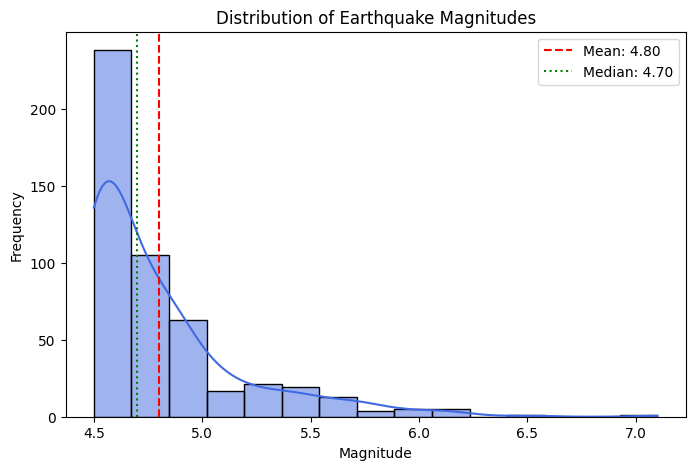

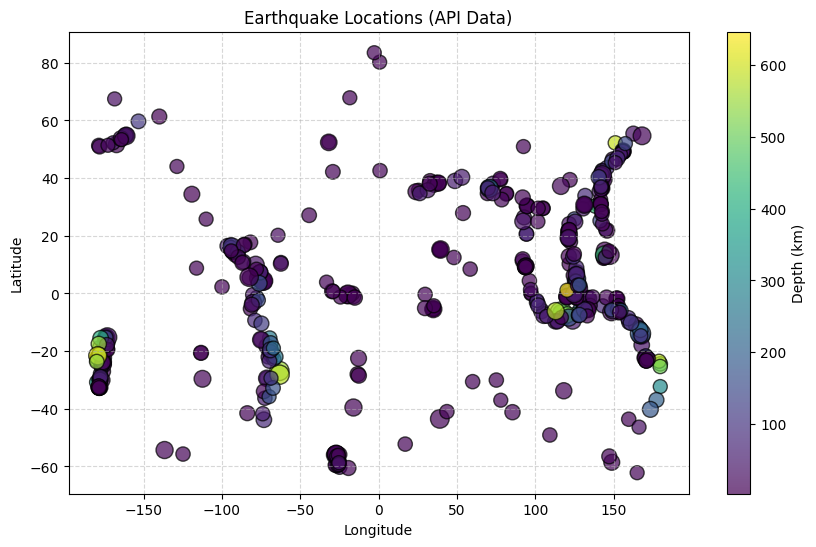

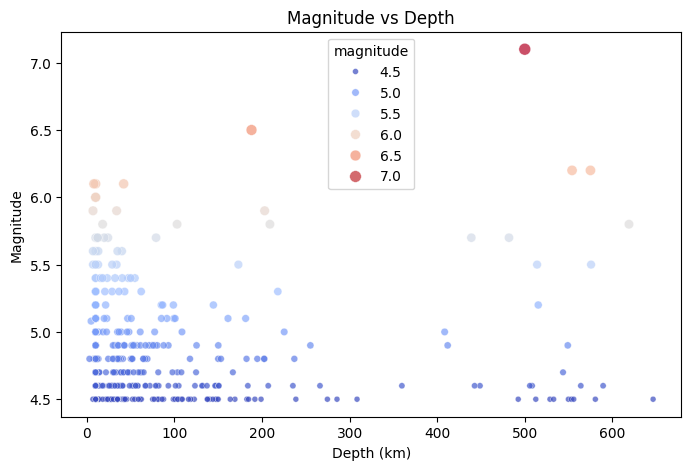

In [ ]:
#Seismic Sensor API
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)

print(df_api.describe())
print(df_api.info())

plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True, color="royalblue")
plt.axvline(df_api['magnitude'].mean(), color='red', linestyle='--', label=f"Mean: {df_api['magnitude'].mean():.2f}")
plt.axvline(df_api['magnitude'].median(), color='green', linestyle=':', label=f"Median: {df_api['magnitude'].median():.2f}")
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
sc = plt.scatter(df_api['longitude'], df_api['latitude'],
                 s=df_api['magnitude']**2 * 5,
                 c=df_api['depth'], cmap="viridis", alpha=0.7, edgecolor="k")
plt.colorbar(sc, label="Depth (km)")
plt.title("Earthquake Locations (API Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="depth", y="magnitude", hue="magnitude", palette="coolwarm", size="magnitude", alpha=0.7)
plt.title("Magnitude vs Depth")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()




            Latitude      Longitude          Depth      Magnitude
count  232593.000000  232593.000000  232593.000000  232593.000000
mean        4.349268      44.784629      73.855634       4.896287
std        28.992826     120.591730     118.988866       0.420070
min       -84.133000    -179.999000      -2.540000       4.500000
25%       -17.042000     -71.016900      14.300000       4.600000
50%         0.383000     102.862000      33.000000       4.800000
75%        29.024000     142.761000      65.400000       5.100000
max        87.221000     179.999300     700.900000       9.100000
Missing values: Date         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
Location     0
dtype: int64


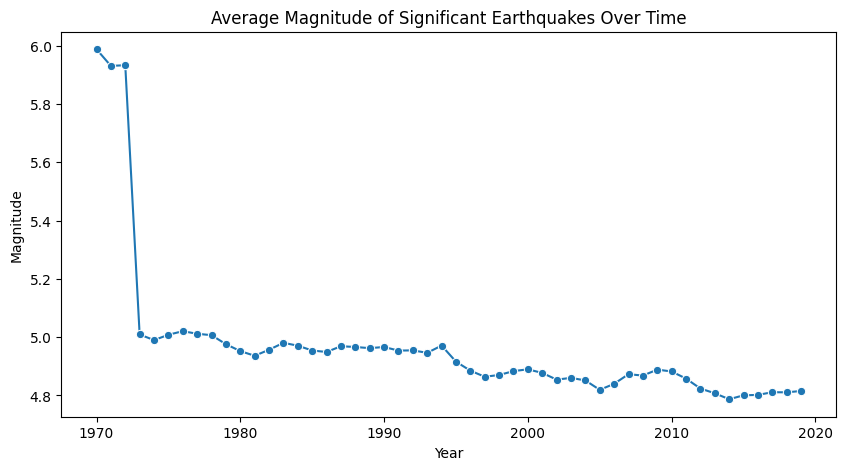

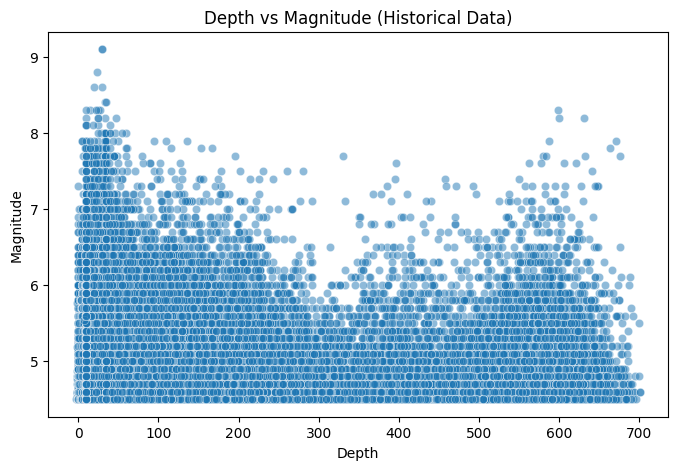

In [ ]:
#Earthquake Historical Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load a historical dataset (Kaggle/NOAA/USGS archive)
df_hist = pd.read_csv("/content/consolidated_data.csv")

# Select & clean - using the correct column names from your dataset
df_hist = df_hist[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df_hist['time'] = pd.to_datetime(df_hist['time'], errors='coerce')
df_hist = df_hist.dropna()

df_hist = df_hist.rename(columns={
    'time': 'Date',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'depth': 'Depth',
    'mag': 'Magnitude',
    'place': 'Location'
})

df_hist = df_hist[df_hist['Magnitude'] >= 4.5]

print(df_hist.describe())
print("Missing values:", df_hist.isnull().sum())

# Time series trend
df_hist['Year'] = df_hist['Date'].dt.year
plt.figure(figsize=(10,5))
yearly_avg = df_hist.groupby('Year')['Magnitude'].mean().reset_index()
sns.lineplot(data=yearly_avg, x='Year', y='Magnitude', marker="o")
plt.title("Average Magnitude of Significant Earthquakes Over Time")
plt.show()

# Magnitude vs Depth
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hist, x="Depth", y="Magnitude", alpha=0.5)
plt.title("Depth vs Magnitude (Historical Data)")
plt.show()


Setting CRS to EPSG:4326 (WGS84)
Soil data loaded successfully!
Columns: ['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry']
Number of soil types: 34112
CRS: EPSG:4326

First few rows:
   SNUM FAOSOIL DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST  CNTCODE  \
0  3479  Rx1-2c     Rx   None   None       0       0          1       85   
1  6998      GL     GL   None   None       0       0          1       85   
2  6998      GL     GL   None   None       0       0          1       85   
3  6998      GL     GL   None   None       0       0          1       85   
4  3479  Rx1-2c     Rx   None   None       0       0          1       85   

  CNTNAME    SQKM    COUNTRY  \
0      GL  4194.0  GREENLAND   
1      GL  8798.0  GREENLAND   
2      GL   659.0  GREENLAND   
3      GL    69.0  GREENLAND   
4      GL   204.0  GREENLAND   

                                            geometry  
0  POLYGON ((-34.67598 

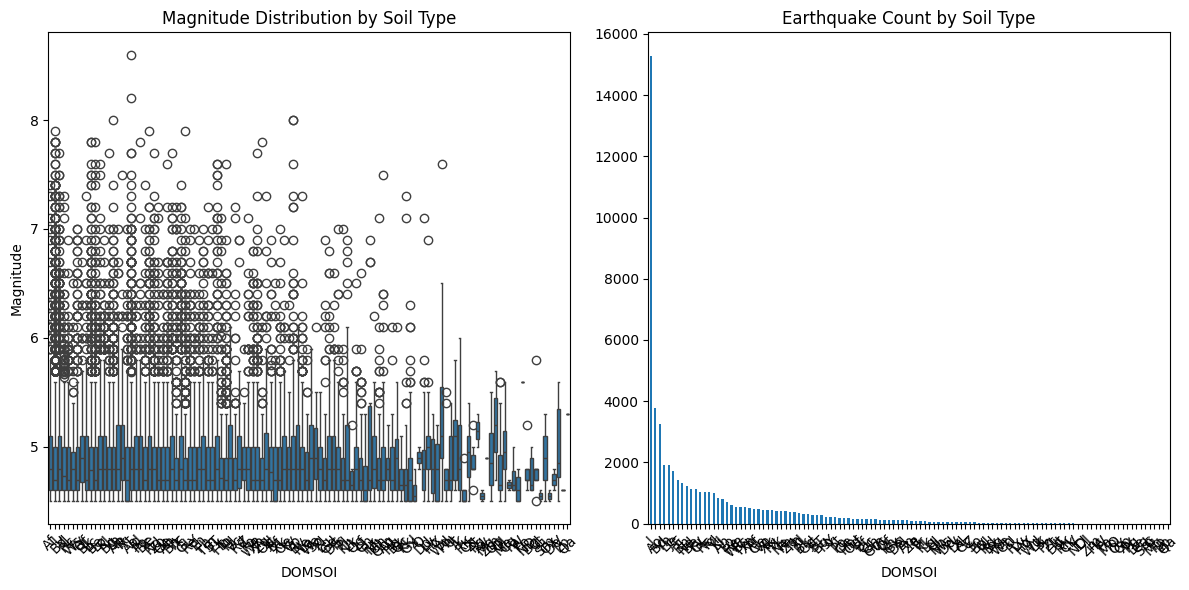

/tmp/ipython-input-1120823736.py:105: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


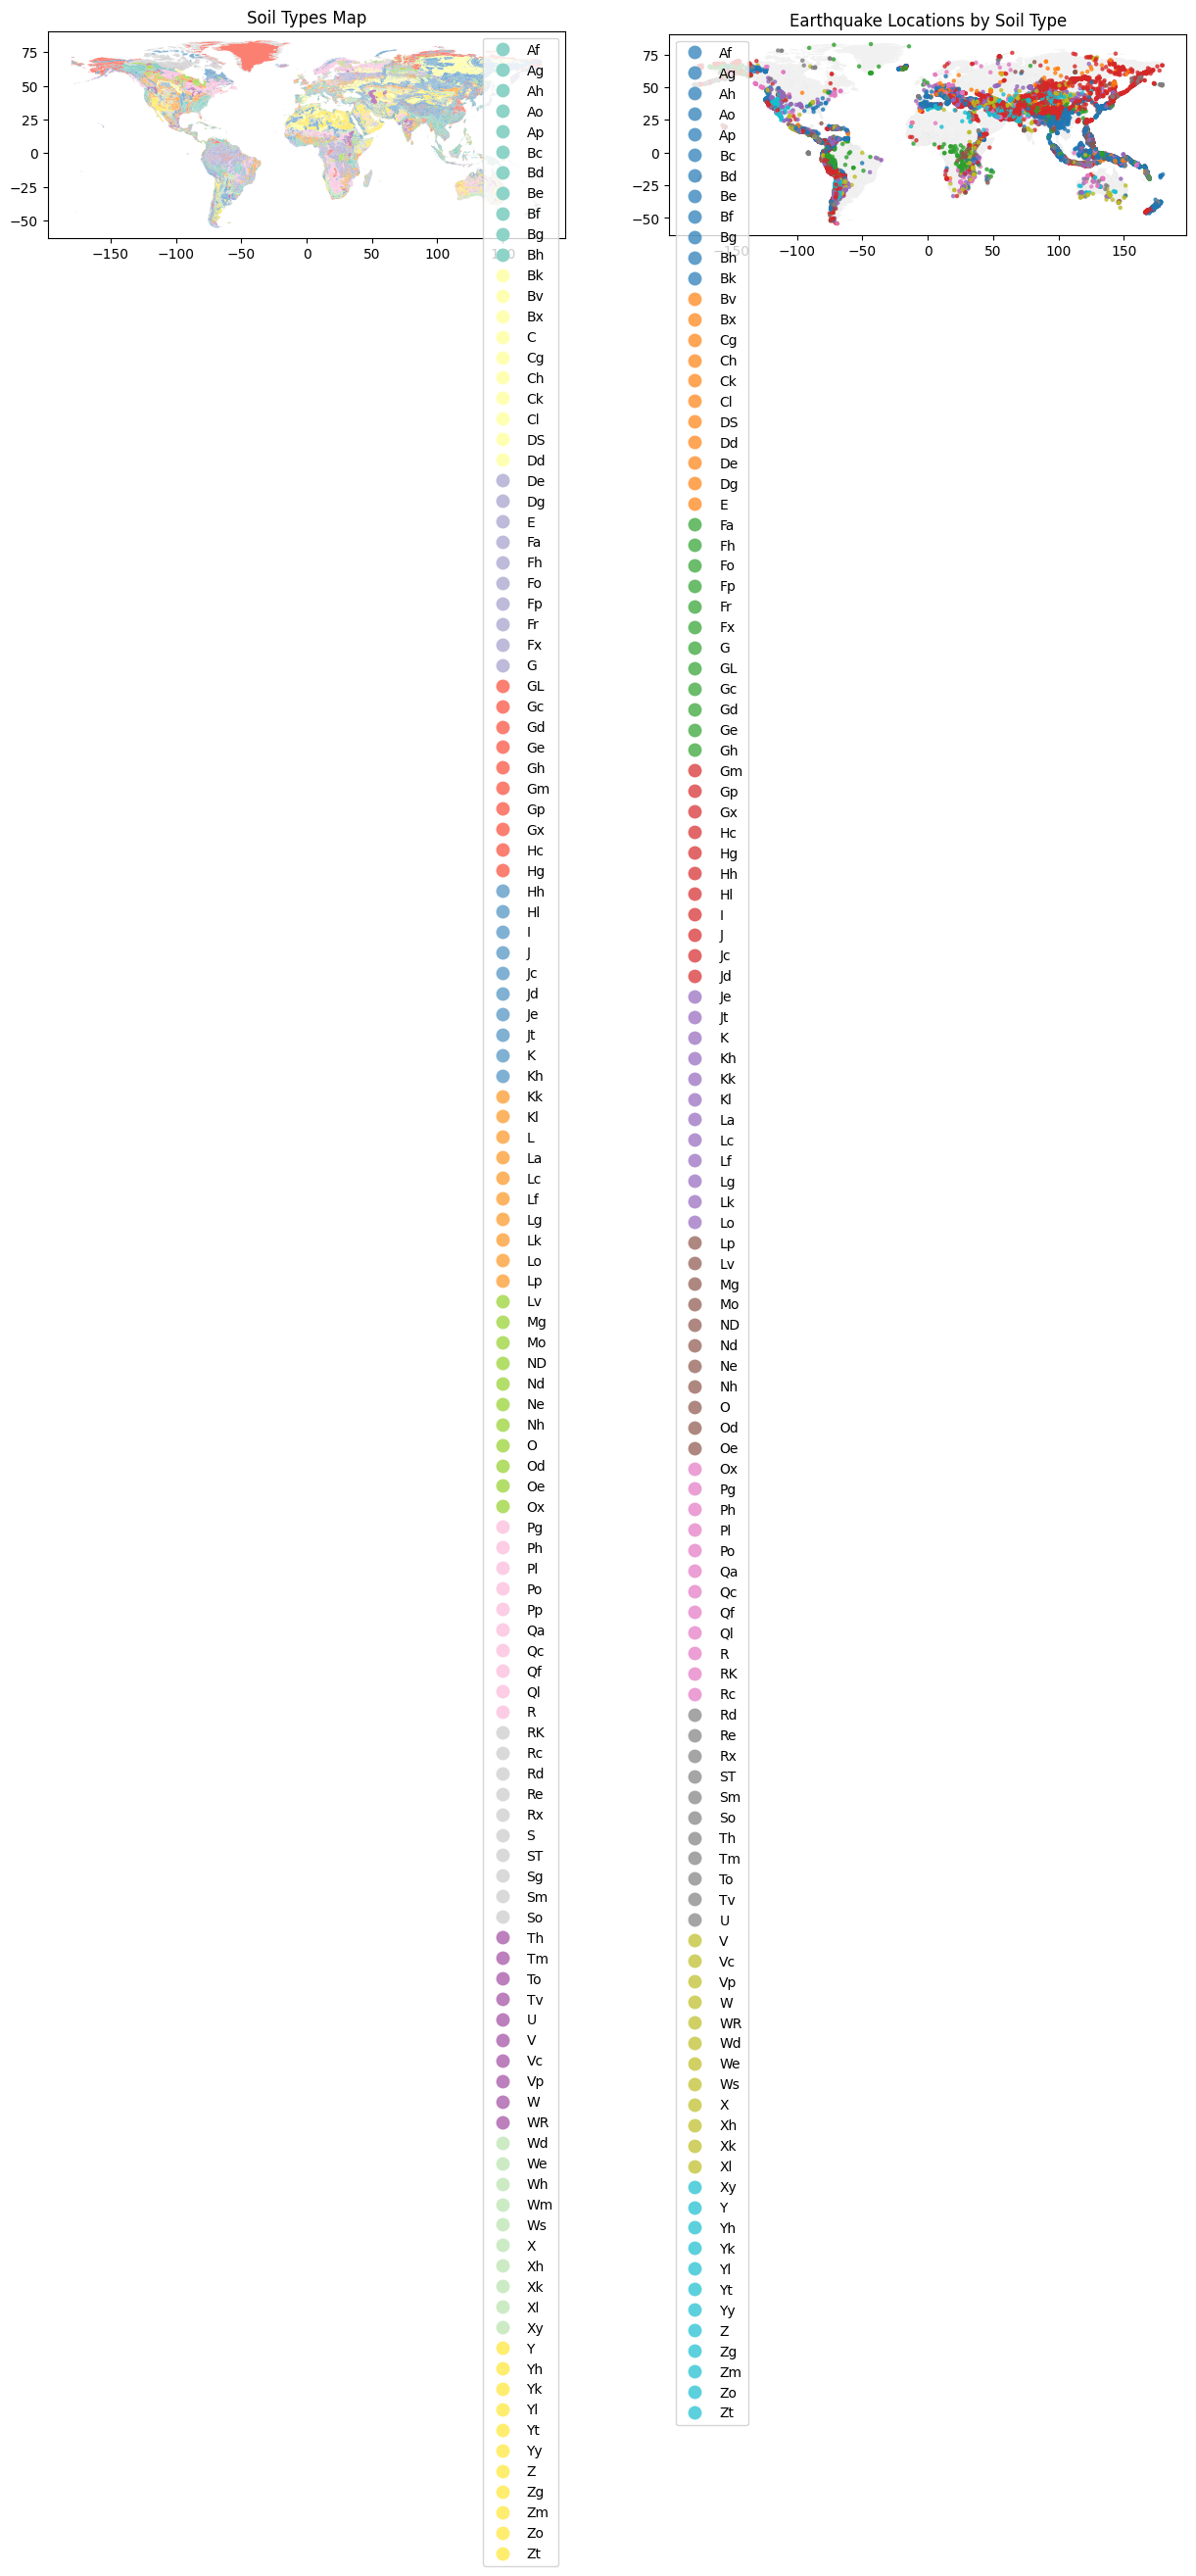


Statistical summary by soil type:
        count      mean       std  min  max
DOMSOI                                     
Af        488  4.898566  0.461426  4.5  7.4
Ag         22  4.813636  0.225294  4.5  5.2
Ah        800  4.875212  0.411510  4.5  7.6
Ao       3789  4.877590  0.418964  4.5  8.6
Ap        112  5.006250  0.538145  4.5  7.0
...       ...       ...       ...  ...  ...
Z          42  4.888095  0.293176  4.5  5.9
Zg         87  4.849425  0.439046  4.5  7.8
Zm          4  4.925000  0.434933  4.5  5.5
Zo        387  4.846253  0.384418  4.5  7.2
Zt          8  4.862500  0.176777  4.6  5.2

[116 rows x 5 columns]


In [ ]:
#Soil Data
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely.geometry import Point

def load_soil_data(shapefile_path):
    """Load soil data with error handling"""
    try:
        # Load the shapefile
        soil_data = gpd.read_file(shapefile_path)


        if soil_data.crs is None:
            soil_data = soil_data.set_crs("EPSG:4326")
            print("Setting CRS to EPSG:4326 (WGS84)")

        return soil_data

    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None

# Load soil data
soil_data = load_soil_data("/content/DSMW.shp")

if soil_data is not None:
    print("Soil data loaded successfully!")
    print(f"Columns: {soil_data.columns.tolist()}")
    print(f"Number of soil types: {len(soil_data)}")
    print(f"CRS: {soil_data.crs}")
    print("\nFirst few rows:")
    print(soil_data.head())

    # Check available columns for soil classification
    # Common column names in FAO DSMW:
    possible_soil_columns = ['SU_SYM90', 'DOMSOI', 'SU_SYM85', 'SOIL', 'CODE']
    available_soil_cols = [col for col in possible_soil_columns if col in soil_data.columns]
    print(f"\nAvailable soil columns: {available_soil_cols}")

    if available_soil_cols:
        soil_column = available_soil_cols[0]  # Using the first available soil column
        print(f"Using soil column: {soil_column}")

        # Convert earthquake data to GeoDataFrame
        eq_points = gpd.GeoDataFrame(
            df_hist,
            geometry=gpd.points_from_xy(df_hist.Longitude, df_hist.Latitude),
            crs="EPSG:4326"
        )

        # Ensure both datasets have the same CRS
        soil_data = soil_data.to_crs(eq_points.crs)

        print(f"Earthquake points: {len(eq_points)}")
        print(f"Soil polygons: {len(soil_data)}")

        # Spatial join - find which soil polygon contains each earthquake point
        eq_with_soil = gpd.sjoin(
            eq_points,
            soil_data[[soil_column, 'geometry']],
            how="left",
            predicate='within'
        )

        # Check results
        print(f"\nEarthquakes with soil data: {len(eq_with_soil)}")
        print(f"Earthquakes without soil data (NaN): {eq_with_soil[soil_column].isna().sum()}")

        # EDA Analysis
        print(f"\nSoil type distribution:")
        print(eq_with_soil[soil_column].value_counts())

        # Magnitude distribution by soil type
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=eq_with_soil, x=soil_column, y="Magnitude")
        plt.title("Magnitude Distribution by Soil Type")
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        soil_counts = eq_with_soil[soil_column].value_counts()
        soil_counts.plot(kind='bar')
        plt.title("Earthquake Count by Soil Type")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Map visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Soil map
        soil_data.plot(column=soil_column, ax=ax1, legend=True, cmap='Set3')
        ax1.set_title("Soil Types Map")

        # Plot 2: Earthquakes over soil types
        soil_data.plot(ax=ax2, color='lightgrey', alpha=0.3)
        eq_with_soil.plot(ax=ax2, column=soil_column, legend=True,
                         markersize=5, alpha=0.7)
        ax2.set_title("Earthquake Locations by Soil Type")

        plt.tight_layout()
        plt.show()

        # Statistical summary
        print("\nStatistical summary by soil type:")
        stats_by_soil = eq_with_soil.groupby(soil_column)['Magnitude'].agg(['count', 'mean', 'std', 'min', 'max'])
        print(stats_by_soil)

    else:
        print("No standard soil classification columns found.")
        print("Available columns:", soil_data.columns.tolist())

else:
    print("Failed to load soil data.")

    # Debug: Check if files are accessible
    dataset_dir = "/content/DSMW.shx"
    if os.path.exists(dataset_dir):
        files = os.listdir(dataset_dir)
        print(f"Files in directory: {files}")
    else:
        print(f"Directory does not exist: {dataset_dir}")


Missing values per column:
Date                0
Latitude            0
Longitude           0
Depth               0
Magnitude           0
Location            0
Year                0
geometry            0
index_right    178912
DOMSOI         178912
dtype: int64


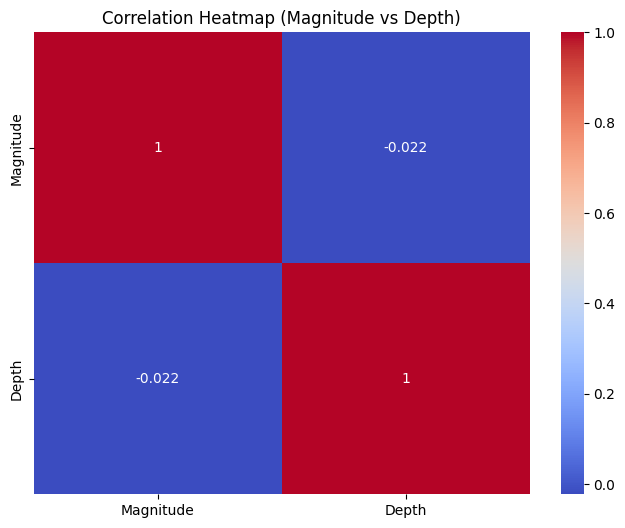

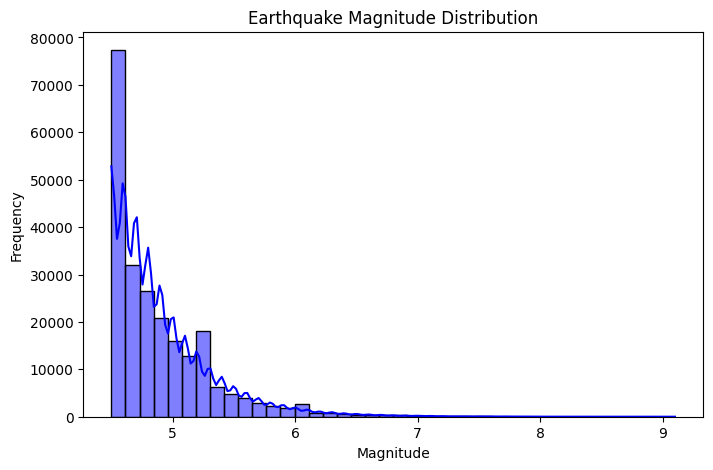

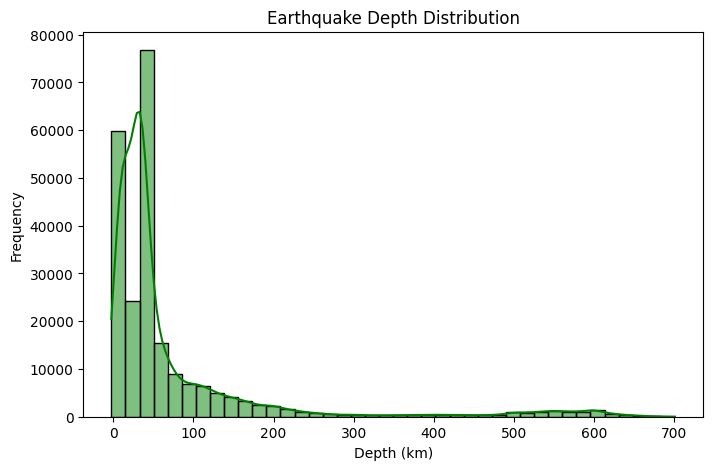

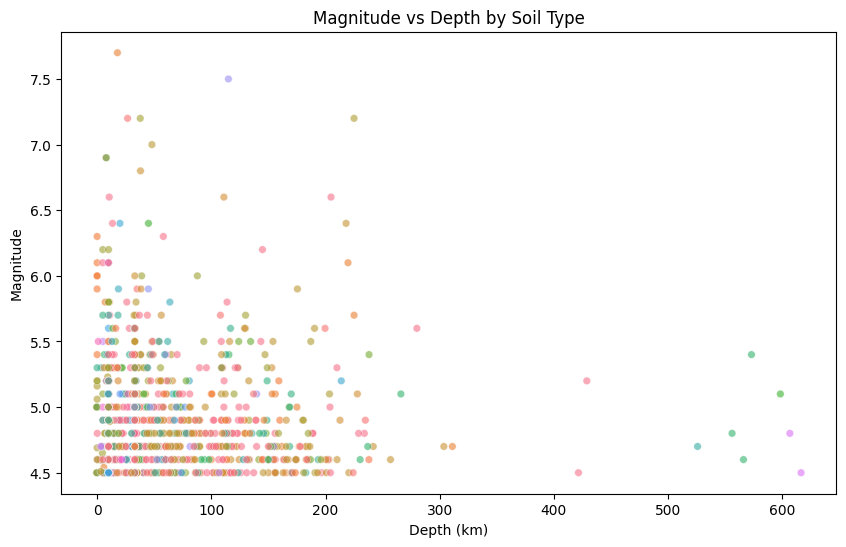

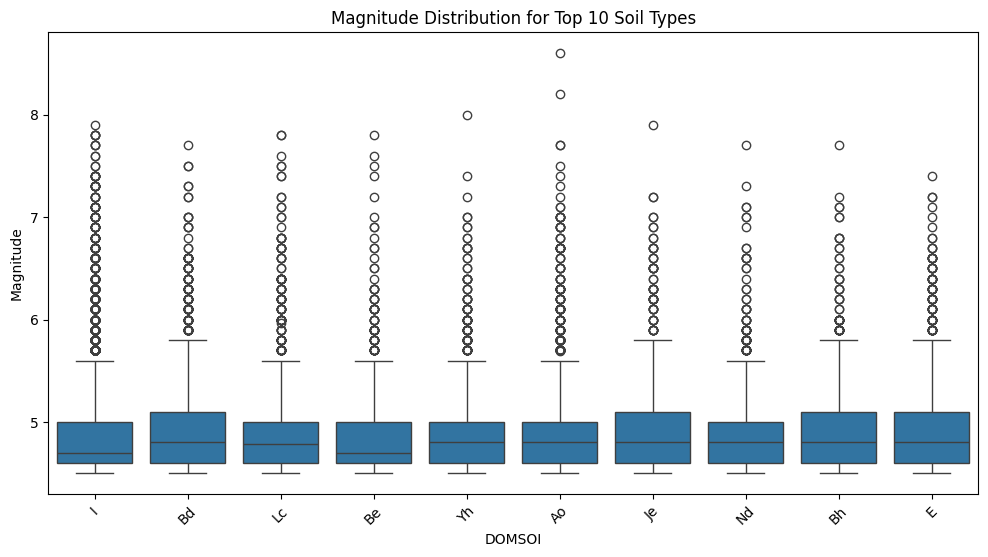

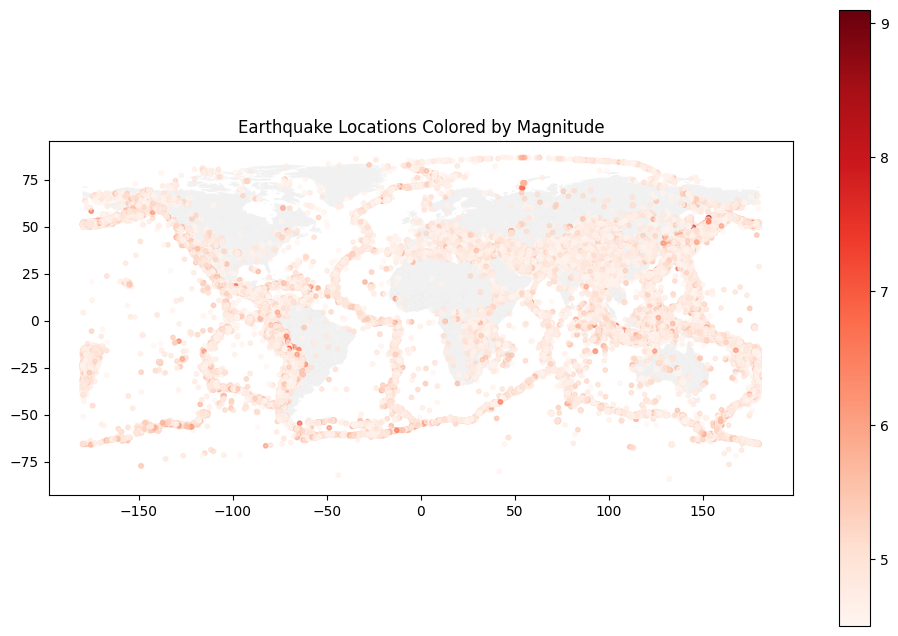

/tmp/ipython-input-2643866979.py:70: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  eq_with_soil.set_index('Date').resample('M')['Magnitude'].count().plot()


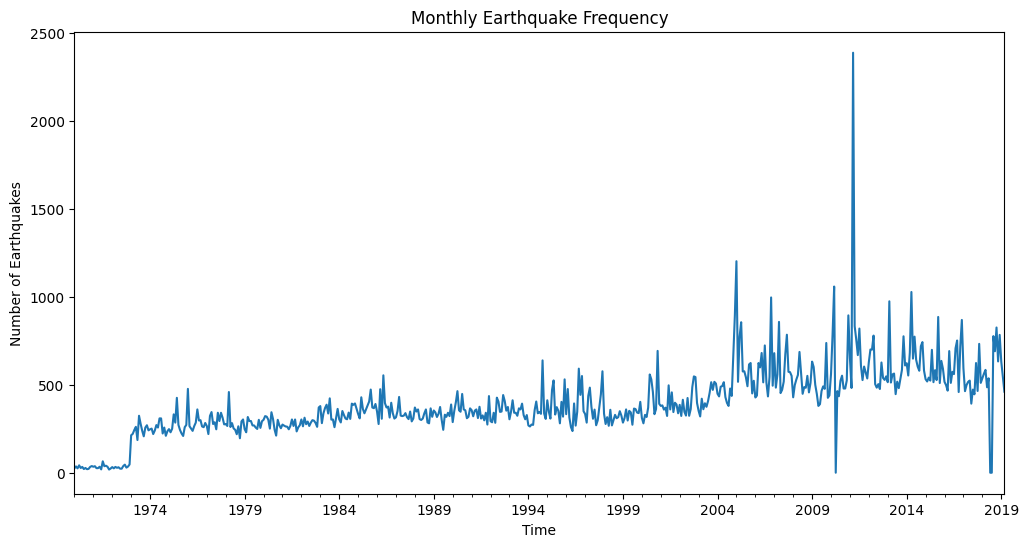

/tmp/ipython-input-2643866979.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  eq_with_soil.set_index('Date').resample('M')['Magnitude'].mean().plot(color="red")


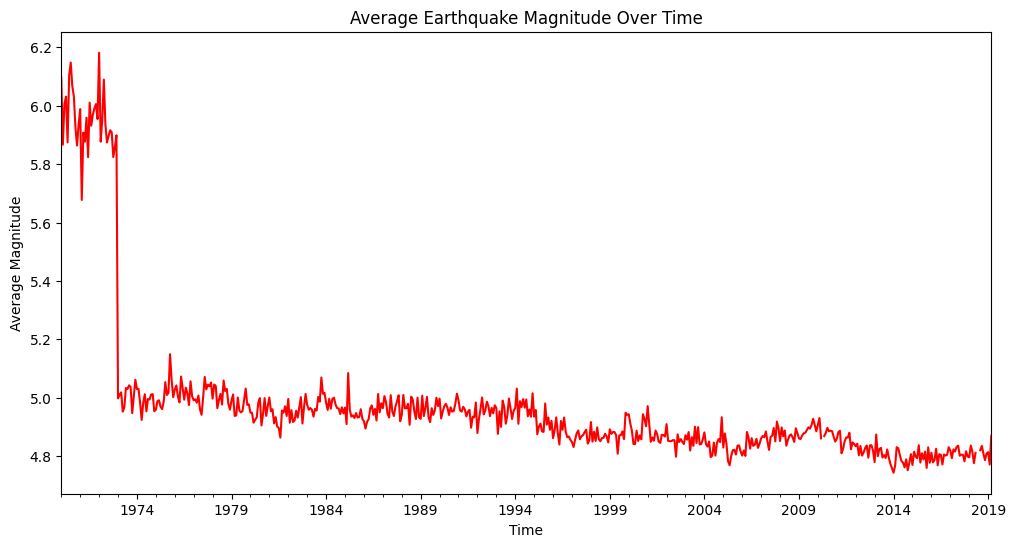

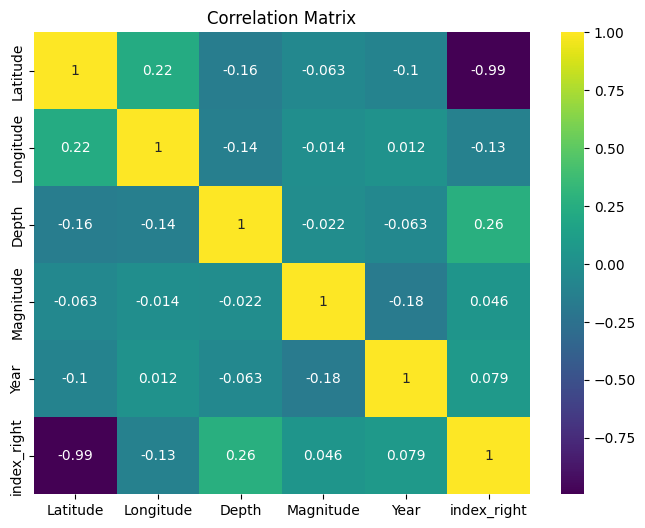

In [ ]:
# Exploratory Data Analysis (EDA)

# 1. Missing values check
print("\nMissing values per column:")
print(eq_with_soil.isna().sum())

# 2. Correlation heatmap (numerical variables only)
plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil[['Magnitude','Depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
plt.show()

# 3. Magnitude histogram
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 4. Depth distribution
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 5. Magnitude vs Depth scatter (colored by soil type)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=eq_with_soil.sample(5000, random_state=42),  # sample for clarity
    x="Depth", y="Magnitude", hue="DOMSOI", alpha=0.6, s=30, legend=False
)
plt.title("Magnitude vs Depth by Soil Type")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

# 6. Top N soil types vs Magnitude
top_soils = eq_with_soil['DOMSOI'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(
    data=eq_with_soil[eq_with_soil['DOMSOI'].isin(top_soils)],
    x="DOMSOI", y="Magnitude"
)
plt.title("Magnitude Distribution for Top 10 Soil Types")
plt.xticks(rotation=45)
plt.show()

# 7. Map: magnitude intensity
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
soil_data.plot(ax=ax, color="lightgrey", alpha=0.3)
eq_with_soil.plot(
    ax=ax,
    column="Magnitude",
    cmap="Reds",
    markersize=10,
    alpha=0.6,
    legend=True
)
ax.set_title("Earthquake Locations Colored by Magnitude")
plt.show()

# Convert 'Date' column to datetime if not already
eq_with_soil['Date'] = pd.to_datetime(eq_with_soil['Date'])

# Earthquakes over time
plt.figure(figsize=(12,6))
eq_with_soil.set_index('Date').resample('M')['Magnitude'].count().plot()
plt.title("Monthly Earthquake Frequency")
plt.ylabel("Number of Earthquakes")
plt.xlabel("Time")
plt.show()

# Average magnitude over time
plt.figure(figsize=(12,6))
eq_with_soil.set_index('Date').resample('M')['Magnitude'].mean().plot(color="red")
plt.title("Average Earthquake Magnitude Over Time")
plt.ylabel("Average Magnitude")
plt.xlabel("Time")
plt.show()

# Correlation across
plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()


API dataset columns: ['time', 'place', 'magnitude', 'longitude', 'latitude', 'depth']
Historical dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Year']
Common columns available: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']

Date column types before conversion:
df_api Date type: datetime64[ns]
df_hist Date type: datetime64[ns, UTC]
Failed date conversions in df_api: 0
Failed date conversions in df_hist: 0
df_api Date type after conversion: datetime64[ns]
df_hist Date type after conversion: datetime64[ns]

Unified dataset shape: (233085, 7)
Data sources distribution:
Source
Historical    232593
API              492
Name: count, dtype: int64

First few rows:
                 Date  Latitude  Longitude  Depth  Magnitude  \
0 1970-01-01 17:11:00   -29.400   -177.169   35.0        5.6   
1 1970-01-04 17:00:41    24.185    102.543   11.3        7.1   
2 1970-01-05 11:49:10    23.984    102.732   15.0        5.9   
3 1970-01

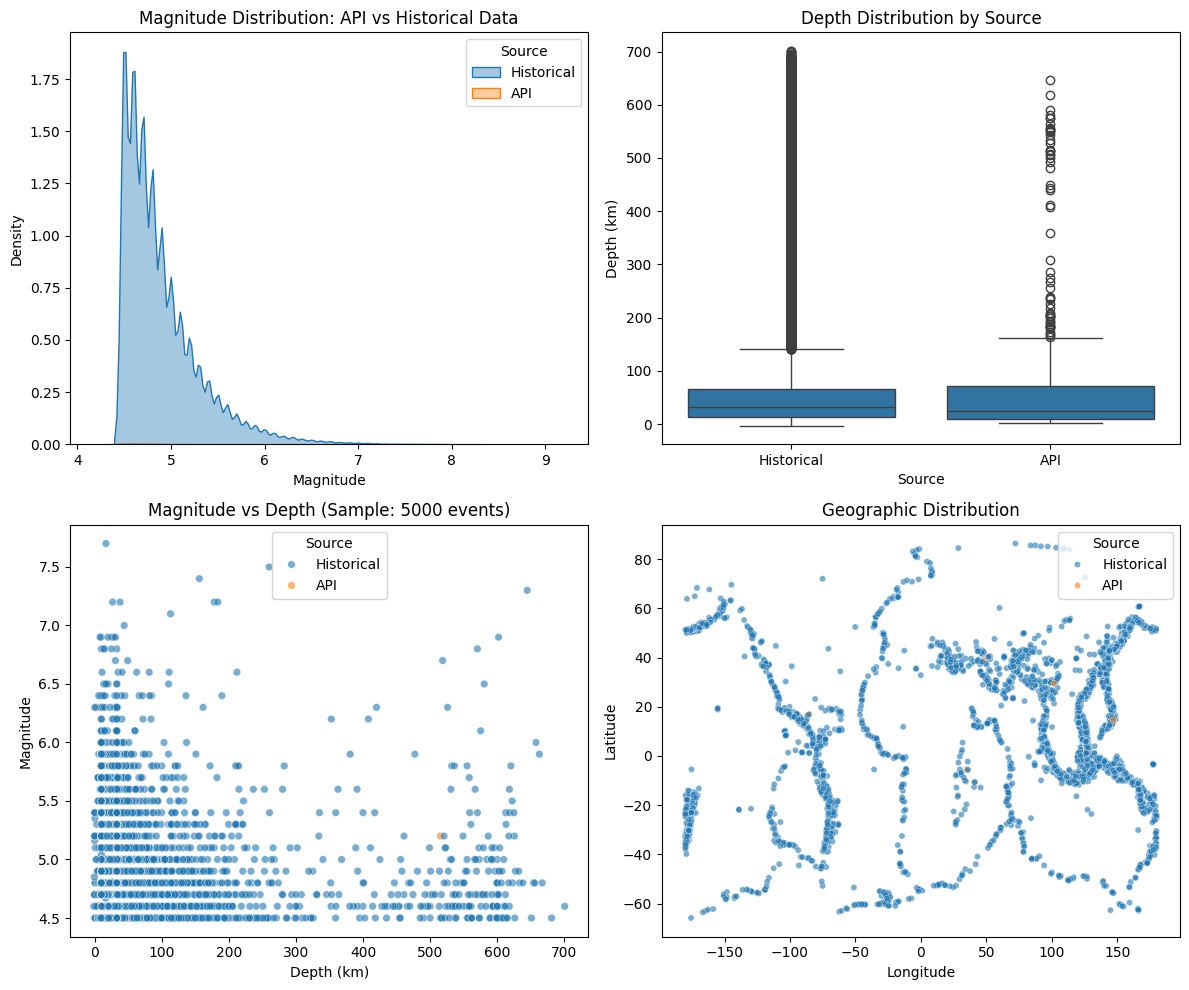

Date column type before Year extraction: datetime64[ns]


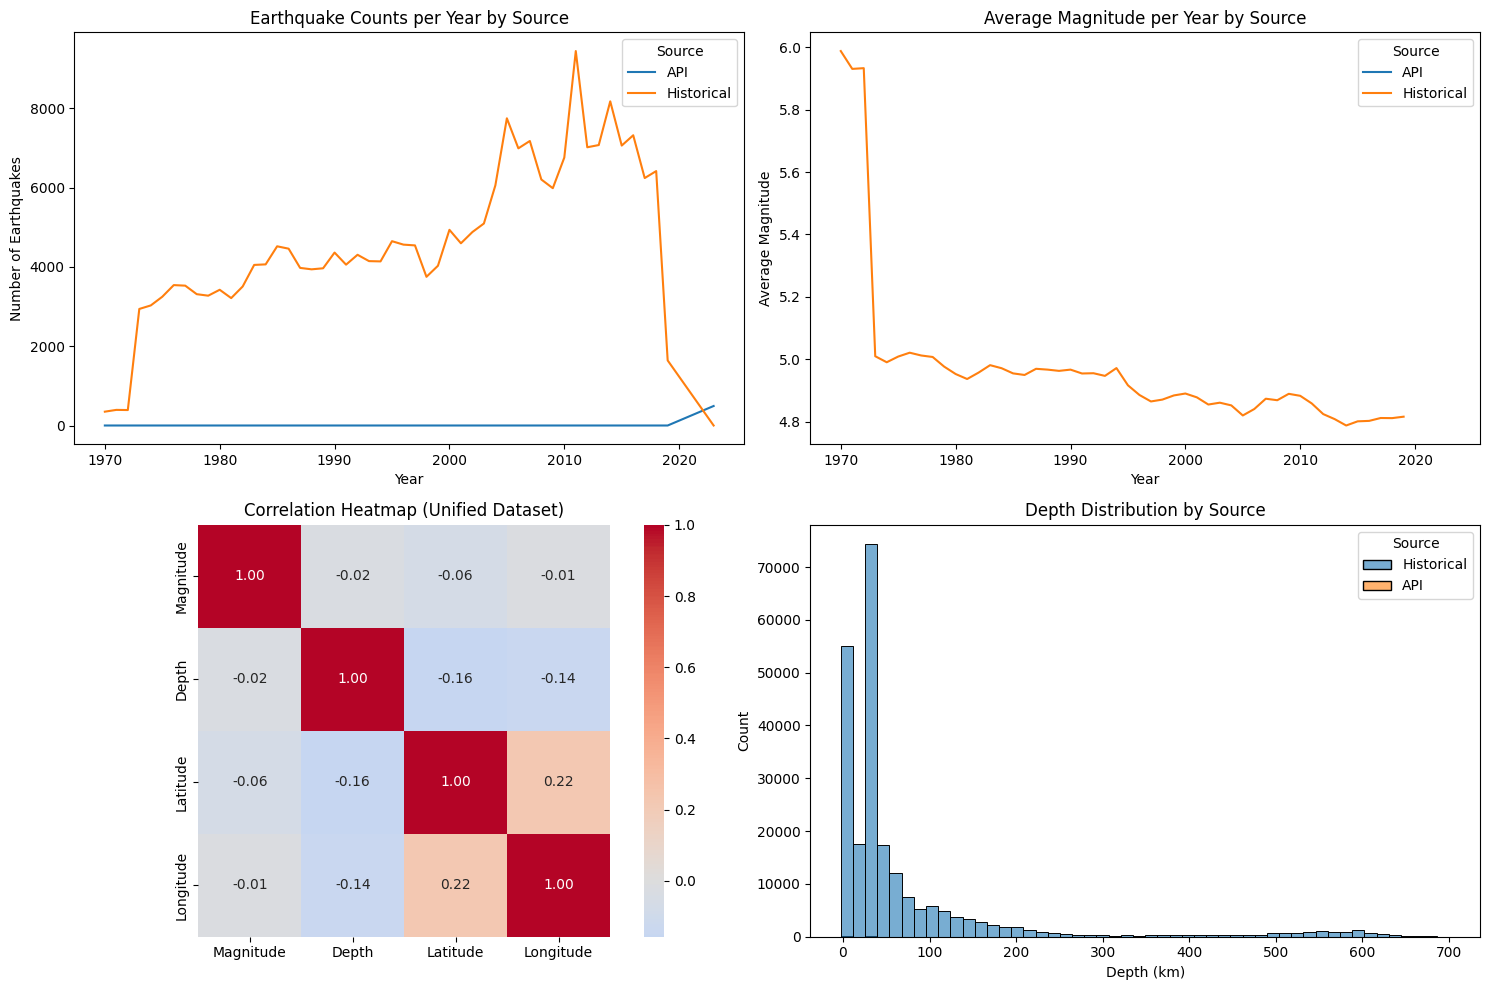

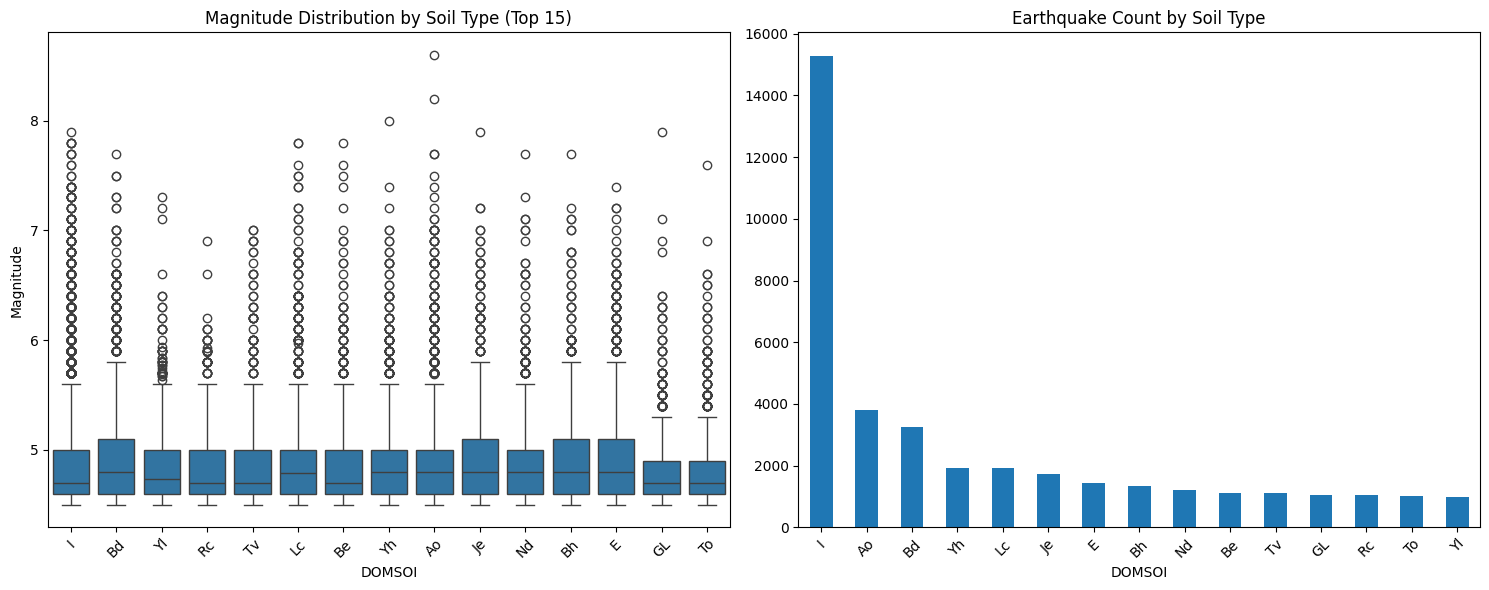


=== SOIL TYPE ANALYSIS ===
       Magnitude                  Depth         
           count   mean    std     mean      std
DOMSOI                                          
Af           488  4.899  0.461   33.461   42.803
Ag            22  4.814  0.225   37.786   35.943
Ah           800  4.875  0.412   53.914   55.742
Ao          3789  4.878  0.419   62.065   63.428
Ap           112  5.006  0.538  239.019  246.852
Bc           536  4.842  0.390   51.995   63.716
Bd          3248  4.914  0.430   57.220   51.892
Be          1121  4.886  0.446   37.259   44.585
Bf           159  4.817  0.385   70.035   37.554
Bg           268  4.878  0.436   65.671   72.325


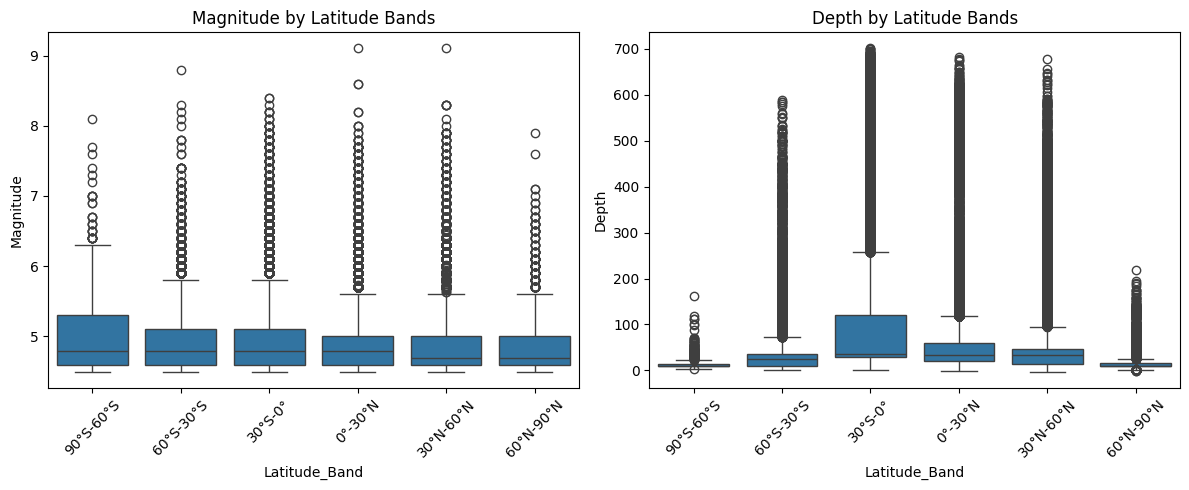


=== UNIFIED DATASET SUMMARY ===
Total earthquakes: 233,085
Time range: 1970-01-01 17:11:00 to 2023-08-31 21:43:25.888000
Geographic range: Lat(-84.1 to 87.2)
                 Lon(-180.0 to 180.0)
Magnitude range: 4.5 to 9.1
Depth range: -2.5 to 700.9 km

=== DATA QUALITY CHECK ===
Missing values per column:
Date                  0
Latitude              0
Longitude             0
Depth                 0
Magnitude             0
Location              0
Source                0
merge_id              0
DOMSOI           179404
Year                  0
Latitude_Band         0
dtype: int64

Soil data coverage: 23.0%

Unified dataset saved to: unified_earthquake_data.csv


In [ ]:
# Merge datasets and save final data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # Import os module

# --- Step 1. Align API + Historical datasets ---
print("API dataset columns:", df_api.columns.tolist())
print("Historical dataset columns:", df_hist.columns.tolist())

# Fix the column naming issue
df_api = df_api.rename(columns={
    "time": "Date",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location"
})

# Add source identifiers
df_api["Source"] = "API"
df_hist["Source"] = "Historical"

# Handle missing 'Location' column if it doesn't exist in df_api
if 'Location' not in df_api.columns:
    df_api['Location'] = "Unknown"

# Keep consistent columns (ensure they exist in both datasets)
available_common_cols = []
for col in ["Date", "Latitude", "Longitude", "Depth", "Magnitude", "Location", "Source"]:
    if col in df_api.columns and col in df_hist.columns:
        available_common_cols.append(col)

print("Common columns available:", available_common_cols)

df_api = df_api[available_common_cols]
df_hist = df_hist[available_common_cols]

# --- Step 2. Fix timezone compatibility issue ---
print("\nDate column types before conversion:")
print(f"df_api Date type: {df_api['Date'].dtype}")
print(f"df_hist Date type: {df_hist['Date'].dtype}")

# Convert both to timezone-naive datetime to avoid conflicts
df_api['Date'] = pd.to_datetime(df_api['Date'], errors='coerce')
df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')

# If historical data has timezone info, remove it
if df_hist['Date'].dtype == 'datetime64[ns, UTC]':
    df_hist['Date'] = df_hist['Date'].dt.tz_localize(None)

# Check for any failed conversions
print(f"Failed date conversions in df_api: {df_api['Date'].isna().sum()}")
print(f"Failed date conversions in df_hist: {df_hist['Date'].isna().sum()}")

# Remove rows with invalid dates
df_api = df_api.dropna(subset=['Date'])
df_hist = df_hist.dropna(subset=['Date'])

print(f"df_api Date type after conversion: {df_api['Date'].dtype}")
print(f"df_hist Date type after conversion: {df_hist['Date'].dtype}")

# --- Step 3. Merge both datasets ---
df_all = pd.concat([df_hist, df_api], ignore_index=True)

print("\nUnified dataset shape:", df_all.shape)
print("Data sources distribution:")
print(df_all['Source'].value_counts())
print("\nFirst few rows:")
print(df_all.head())
print(f"Unified Date type: {df_all['Date'].dtype}")

# --- Step 4. Attach Soil/Geological Data ---
# Create a unique identifier for merging
df_all['merge_id'] = df_all['Latitude'].round(3).astype(str) + '_' + df_all['Longitude'].round(3).astype(str)

# Prepare soil data with same identifier
if 'eq_with_soil' in globals():
    eq_with_soil['merge_id'] = eq_with_soil['Latitude'].round(3).astype(str) + '_' + eq_with_soil['Longitude'].round(3).astype(str)

    # Merge soil data
    df_all_geo = pd.merge(
        df_all,
        eq_with_soil[['merge_id', 'DOMSOI']].drop_duplicates(),
        on='merge_id',
        how='left'
    )
else:
    print("Soil data not available, proceeding without it")
    df_all_geo = df_all.copy()
    df_all_geo['DOMSOI'] = np.nan

print("\nUnified dataset with soil shape:", df_all_geo.shape)
print("Soil data coverage:", df_all_geo['DOMSOI'].notna().sum(), "out of", len(df_all_geo))
print("\nSample of unified dataset:")
print(df_all_geo.sample(5))

# --- Step 5. Comprehensive Exploratory Data Analysis Across Sources ---

# 1. Basic statistics by source
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all_geo.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max'],
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std']
}).round(3))

# 2. Distribution plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_all_geo, x="Magnitude", hue="Source", fill=True, alpha=0.4)
plt.title("Magnitude Distribution: API vs Historical Data")
plt.xlabel("Magnitude")

plt.subplot(2, 2, 2)
sns.boxplot(data=df_all_geo, x="Source", y="Depth")
plt.title("Depth Distribution by Source")
plt.ylabel("Depth (km)")

plt.subplot(2, 2, 3)
sample_size = min(5000, len(df_all_geo))
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Depth", y="Magnitude", hue="Source", alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample: {sample_size} events)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Longitude", y="Latitude", hue="Source", alpha=0.6, s=20)
plt.title("Geographic Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

# 6. Time-based analysis (now that dates are properly formatted)
# Double-check date type before extracting year
print(f"Date column type before Year extraction: {df_all_geo['Date'].dtype}")

# If still not datetime, force conversion
if not pd.api.types.is_datetime64_any_dtype(df_all_geo['Date']):
    df_all_geo['Date'] = pd.to_datetime(df_all_geo['Date'], errors='coerce')
    # Remove any rows with invalid dates
    df_all_geo = df_all_geo.dropna(subset=['Date'])

df_all_geo['Year'] = df_all_geo['Date'].dt.year

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
yearly_counts = df_all_geo.groupby(['Year', 'Source']).size().unstack(fill_value=0)
yearly_counts.plot(kind='line', ax=plt.gca())
plt.title("Earthquake Counts per Year by Source")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend(title="Source")

plt.subplot(2, 2, 2)
yearly_magnitude = df_all_geo.groupby(['Year', 'Source'])['Magnitude'].mean().unstack()
yearly_magnitude.plot(kind='line', ax=plt.gca())
plt.title("Average Magnitude per Year by Source")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.legend(title="Source")

plt.subplot(2, 2, 3)
correlation_data = df_all_geo[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", center=0,
            square=True, fmt=".2f")
plt.title("Correlation Heatmap (Unified Dataset)")

plt.subplot(2, 2, 4)
sns.histplot(data=df_all_geo, x='Depth', hue='Source', bins=50, alpha=0.6)
plt.title("Depth Distribution by Source")
plt.xlabel("Depth (km)")

plt.tight_layout()
plt.show()

# 7. Soil type analysis (if available)
if df_all_geo['DOMSOI'].notna().sum() > 0:
    plt.figure(figsize=(15, 6))

    top_soils = df_all_geo['DOMSOI'].value_counts().head(15).index
    soil_data_subset = df_all_geo[df_all_geo['DOMSOI'].isin(top_soils)]

    plt.subplot(1, 2, 1)
    sns.boxplot(data=soil_data_subset, x="DOMSOI", y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type (Top 15)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = soil_data_subset['DOMSOI'].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n=== SOIL TYPE ANALYSIS ===")
    soil_stats = df_all_geo.groupby('DOMSOI').agg({
        'Magnitude': ['count', 'mean', 'std'],
        'Depth': ['mean', 'std']
    }).round(3)
    print(soil_stats.head(10))

# 8. Advanced spatial analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_all_geo['Latitude_Band'] = pd.cut(df_all_geo['Latitude'],
                                    bins=np.arange(-90, 91, 30),
                                    labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                           '0°-30°N', '30°N-60°N', '60°N-90°N'])
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. Summary statistics for the unified dataset
print("\n=== UNIFIED DATASET SUMMARY ===")
print(f"Total earthquakes: {len(df_all_geo):,}")
print(f"Time range: {df_all_geo['Date'].min()} to {df_all_geo['Date'].max()}")
print(f"Geographic range: Lat({df_all_geo['Latitude'].min():.1f} to {df_all_geo['Latitude'].max():.1f})")
print(f"                 Lon({df_all_geo['Longitude'].min():.1f} to {df_all_geo['Longitude'].max():.1f})")
print(f"Magnitude range: {df_all_geo['Magnitude'].min():.1f} to {df_all_geo['Magnitude'].max():.1f}")
print(f"Depth range: {df_all_geo['Depth'].min():.1f} to {df_all_geo['Depth'].max():.1f} km")

# 10. Data quality check
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_all_geo.isnull().sum())
print(f"\nSoil data coverage: {df_all_geo['DOMSOI'].notna().mean():.1%}")

# Create the directory if it doesn't exist
output_dir = '/content/drive/MyDrive/dataset'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Save the unified dataset for future use
df_all_geo.to_csv(os.path.join(output_dir, 'unified_earthquake_data.csv'), index=False)
print("\nUnified dataset saved to: unified_earthquake_data.csv")

In [ ]:
#Preprocessing
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dataset/unified_earthquake_data.csv")

print("Missing values:")
print(df.isnull().sum())

num_cols = ['Magnitude', 'Depth']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with mode
cat_cols = ['Location', 'DOMSOI']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save intermediate version
df.to_csv("/content/drive/MyDrive/dataset/earthquake_cleaned_day1.csv", index=False)


Missing values:
Date                  0
Latitude              0
Longitude             0
Depth                 0
Magnitude             0
Location              0
Source                0
merge_id              0
DOMSOI           179404
Year                  0
Latitude_Band         0
dtype: int64

Missing values after imputation:
Date             0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
Location         0
Source           0
merge_id         0
DOMSOI           0
Year             0
Latitude_Band    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_cleaned_day1.csv")

# Select numeric features
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df_scaled[numeric_features].describe())

# Save scaled dataset
df_scaled.to_csv("/content/drive/MyDrive/dataset/earthquake_scaled_day2.csv", index=False)


          Magnitude         Depth
count  2.330850e+05  2.330850e+05
mean   2.347045e-15 -6.133436e-17
std    1.000002e+00  1.000002e+00
min   -9.430561e-01 -6.419712e-01
25%   -7.049620e-01 -5.013006e-01
50%   -2.287737e-01 -3.433193e-01
75%    4.855086e-01 -7.105370e-02
max    1.000927e+01  5.269218e+00


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_scaled_day2.csv")

# Encode Soil Type (DOMSOI)
if 'DOMSOI' in df.columns:
    encoder = LabelEncoder()
    df['SoilType_Encoded'] = encoder.fit_transform(df['DOMSOI'])
else:
    df['SoilType_Encoded'] = -1  # fallback if missing

# Encode Location (optional, may be too high-cardinality)
df['Location_Encoded'] = LabelEncoder().fit_transform(df['Location'])

print(df[['DOMSOI', 'SoilType_Encoded']].head())

# Save encoded dataset
df.to_csv("/content/drive/MyDrive/dataset/earthquake_encoded_day3.csv", index=False)


  DOMSOI  SoilType_Encoded
0      I                42
1     Af                 0
2     Af                 0
3      I                42
4      I                42


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_encoded_day3.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
print(df.head())


                 Date  Latitude  Longitude     Depth  Magnitude  \
0 1970-01-01 17:11:00   -29.400   -177.169 -0.326513   1.675979   
1 1970-01-04 17:00:41    24.185    102.543 -0.525670   5.247391   
2 1970-01-05 11:49:10    23.984    102.732 -0.494578   2.390262   
3 1970-01-06 05:35:54    -9.583    151.493 -0.494578   3.342638   
4 1970-01-07 07:56:14    15.785    -59.808 -0.312227   2.628356   

                              Location      Source        merge_id DOMSOI  \
0        Kermadec Islands, New Zealand  Historical  -29.4_-177.169      I   
1                        Yunnan, China  Historical  24.185_102.543     Af   
2                        Yunnan, China  Historical  23.984_102.732     Af   
3       D'Entrecasteaux Islands region  Historical  -9.583_151.493      I   
4  east of Guadeloupe, Leeward Islands  Historical  15.785_-59.808      I   

   Year Latitude_Band  SoilType_Encoded  Location_Encoded  Month  Day  Hour  
0  1970       30°S-0°                42             3174

In [ ]:
#Feature Engineering
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_encoded_day3.csv")

# 1. Magnitude Category
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major']
)

# 2. Depth Category
df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-1, 70, 300, 700],
    labels=['Shallow', 'Intermediate', 'Deep']
)

# 3. Risk Score (simple weighted sum)
df['Risk_Score'] = (
    (df['Magnitude'] * 0.7) +
    (np.log1p(df['Depth']) * 0.3)
)

# 4. Spatial Clusters
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Region_Cluster'] = kmeans.fit_predict(coords)

print(df[['Magnitude', 'Depth', 'Risk_Score', 'Region_Cluster']].head())

# Save engineered dataset
df.to_csv("/content/drive/MyDrive/dataset/earthquake_features_day4.csv", index=False)


   Magnitude     Depth  Risk_Score  Region_Cluster
0   1.675979 -0.326513    1.054600               0
1   5.247391 -0.525670    3.449418               4
2   2.390262 -0.494578    1.468475               4
3   3.342638 -0.494578    2.135138               1
4   2.628356 -0.312227    1.727560               2


In [ ]:
# Load latest version
df_final = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_features_day4.csv")

print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())

# Save final dataset for modeling
df_final.to_csv("/content/drive/MyDrive/dataset/earthquake_preprocessed_week2.csv", index=False)


Final dataset shape: (233085, 17)
Final columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source', 'merge_id', 'DOMSOI', 'Year', 'Latitude_Band', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']


In [ ]:
# Model Baseline
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_preprocessed_week2.csv")
print("Sample Magnitude Classes:")
print(df[['Magnitude', 'Magnitude_Class']].head())

print("\nClass Distribution (Magnitude_Class):")
print(df['Magnitude_Class'].value_counts(normalize=True))

print("\nMagnitude Statistics:")
print(df['Magnitude'].describe())

#


Sample Magnitude Classes:
   Magnitude Magnitude_Class
0   1.675979             Low
1   5.247391        Moderate
2   2.390262             Low
3   3.342638             Low
4   2.628356             Low

Class Distribution (Magnitude_Class):
Magnitude_Class
Low         0.982223
Moderate    0.015615
Strong      0.001573
Major       0.000590
Name: proportion, dtype: float64

Magnitude Statistics:
count    2.330850e+05
mean     2.349484e-15
std      1.000002e+00
min     -9.430561e-01
25%     -7.049620e-01
50%     -2.287737e-01
75%      4.855086e-01
max      1.000927e+01
Name: Magnitude, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd # Ensure pandas is imported

# Features & target
# Assuming 'df' here is the `df` from `AGbKoBfF3qGJ` where target has been handled.
# If `df` still contains nulls in `Magnitude_Class` after being loaded, the `dropna` should be applied to `df` *before* defining X and y.
df_for_split = df.dropna(subset=['Magnitude_Class'])
X = df_for_split[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df_for_split['Magnitude_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save X_train for SHAP and later use
X_train.to_csv("X_train_for_shap.csv", index=False)

# Define preprocessing: numeric → median, categorical → most frequent
numeric_cols = ['Magnitude', 'Depth']
categorical_cols = ['SoilType_Encoded', 'Region_Cluster']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

# Build pipeline (imputation + logistic regression)
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='multinomial'))
])

# Fit + predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      0.47      0.64        17
    Moderate       0.99      1.00      0.99       294
      Strong       0.80      0.92      0.86        39

    accuracy                           1.00     19328
   macro avg       0.95      0.85      0.87     19328
weighted avg       1.00      1.00      1.00     19328




=== Decision Tree Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      1.00      1.00        17
    Moderate       1.00      1.00      1.00       294
      Strong       1.00      1.00      1.00        39

    accuracy                           1.00     19328
   macro avg       1.00      1.00      1.00     19328
weighted avg       1.00      1.00      1.00     19328



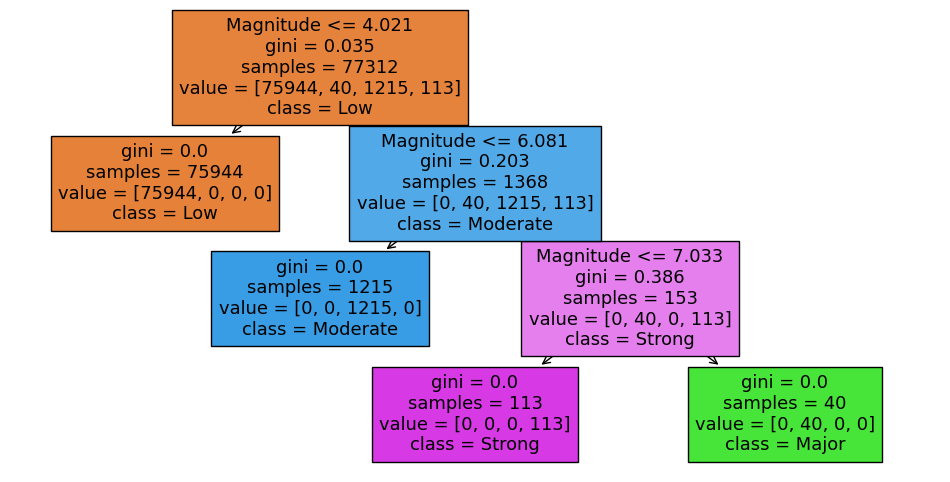

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("\n=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_tree))

# Visualize tree
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()


Logistic Regression Accuracy: 0.999
Decision Tree Accuracy: 1.000


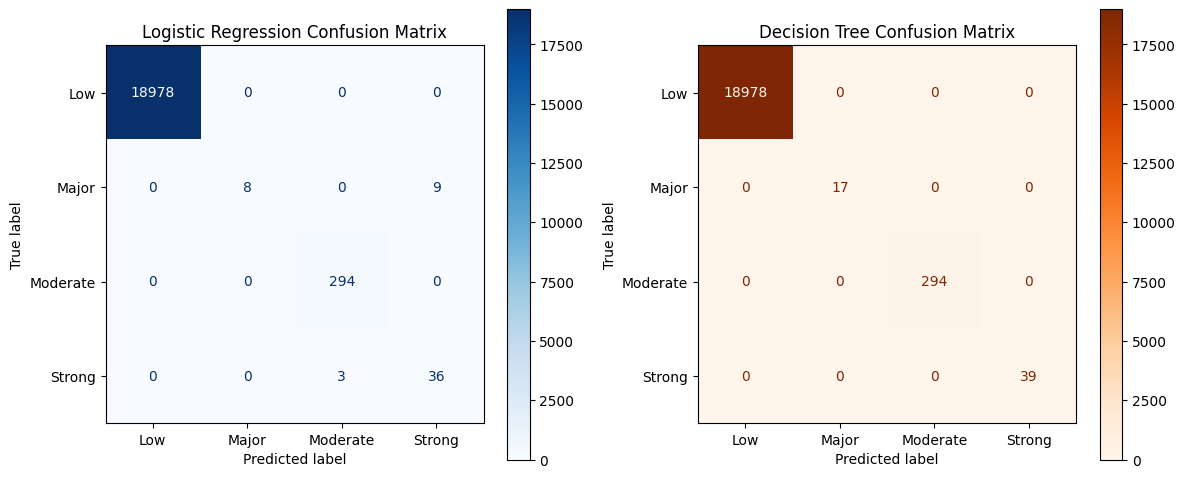

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Logistic Regression
acc_log = accuracy_score(y_test, y_pred)
cm_log = confusion_matrix(y_test, y_pred, labels=clf.named_steps['model'].classes_)

# Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Decision Tree Accuracy: {acc_tree:.3f}")

# Confusion Matrix Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay(cm_log, display_labels=clf.named_steps['model'].classes_).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay(cm_tree, display_labels=tree.classes_).plot(ax=axes[1], cmap="Oranges")
axes[1].set_title("Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()


In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [acc_log, acc_tree]
})

print("\n=== Baseline Model Comparison ===")
print(results)

# Save baseline model results
results.to_csv("/content/drive/MyDrive/dataset/baseline_results_week3.csv", index=False)



=== Baseline Model Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.999379
1        Decision Tree  1.000000



Updated Model Comparison (with F1-score)
                 Model  Accuracy  F1-score
0  Logistic Regression  0.999379  0.873017
1        Decision Tree  1.000000  1.000000


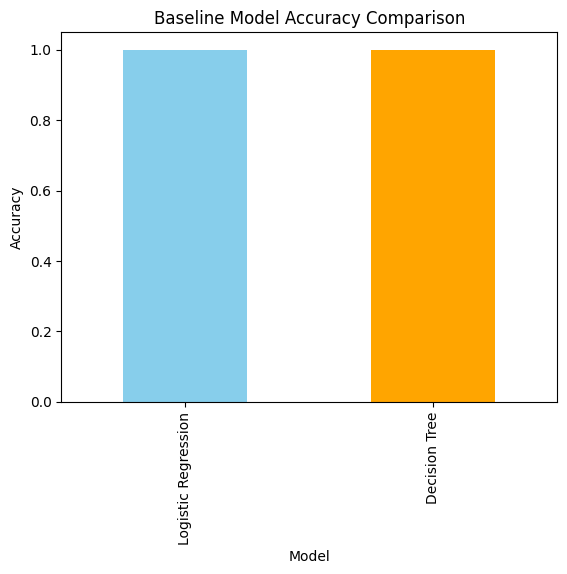

In [ ]:
#F1 Score Comparison
from sklearn.metrics import f1_score

# Compute F1-scores
f1_log = f1_score(y_test, y_pred, average='macro')
f1_tree = f1_score(y_test, y_pred_tree, average='macro')

# Adding to the results table
results['F1-score'] = [f1_log, f1_tree]

print("\nUpdated Model Comparison (with F1-score)")
print(results)

# Model Accuracy Bar Plot Visulaization
results.plot(x='Model', y='Accuracy', kind='bar', color=['skyblue', 'orange'], legend=False)
plt.title('Baseline Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
#Fine-tuning XGBoost
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

#Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

print("Original Classes:", le.classes_)
print("Encoded Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Unique Encoded Classes in Train:", np.unique(y_train_enc))
print("Unique Encoded Classes in Test:", np.unique(y_test_enc))

#Compute class weights (handle imbalance)
class_counts = pd.Series(y_train).value_counts()
total = len(y_train)
num_classes = len(class_counts)

weights_per_label = {cls: total / (num_classes * count) for cls, count in class_counts.items()}
weights_per_encoded = {le.transform([cls])[0]: w for cls, w in weights_per_label.items()}
sample_weights = np.array([weights_per_encoded[label] for label in y_train_enc])

print("Computed class weights:", weights_per_encoded)

#Define base model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    random_state=42,
    tree_method='hist',
    eval_metric='mlogloss',
    use_label_encoder=False
)

#Define parameter grid (balanced for speed and accuracy)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

#Set up cross-validation safely
min_count = class_counts.min()
if min_count >= 3:
    n_splits = 3
elif min_count == 2:
    n_splits = 2
else:
    n_splits = 2
    print("⚠️ Warning: At least one class has only 1 sample — consider gathering more data.")

print(f"Using cv={n_splits} (min class count = {min_count})")
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#Grid Search with weights
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    error_score=np.nan  # Don't stop if one combo fails
)

print("\n🔍 Starting XGBoost fine-tuning...")
grid_search_xgb.fit(X_train, y_train_enc, sample_weight=sample_weights)

best_xgb = grid_search_xgb.best_estimator_
print("\n✅ Best Parameters Found:", grid_search_xgb.best_params_)

#Evaluate on test set
y_pred_xgb_enc = best_xgb.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_xgb_enc)
y_test_orig = np.array(y_test)

acc = accuracy_score(y_test_orig, y_pred_xgb)
print(f"\n🎯 XGBoost Accuracy (Tuned): {acc:.4f}")

# Avoid errors if test set lacks some classes
print("\n📊 Classification Report (XGBoost):")
print(classification_report(y_test_orig, y_pred_xgb, labels=np.unique(y_test_orig)))

#Save model and encoder
joblib.dump(best_xgb, 'xgboost_tuned_weighted.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\n💾 Saved tuned model as 'xgboost_tuned_weighted.pkl'")
print("💾 Saved LabelEncoder as 'label_encoder.pkl'")


Original Classes: ['Low' 'Major' 'Moderate' 'Strong']
Encoded Mapping: {'Low': np.int64(0), 'Major': np.int64(1), 'Moderate': np.int64(2), 'Strong': np.int64(3)}
Unique Encoded Classes in Train: [0 1 2 3]
Unique Encoded Classes in Test: [0 1 2 3]
Computed class weights: {np.int64(0): 0.2545033182344886, np.int64(2): 15.907818930041152, np.int64(3): 171.04424778761063, np.int64(1): 483.2}
Using cv=3 (min class count = 40)

🔍 Starting XGBoost fine-tuning...
Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:10:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best Parameters Found: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

🎯 XGBoost Accuracy (Tuned): 1.0000

📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      1.00      1.00        17
    Moderate       1.00      1.00      1.00       294
      Strong       1.00      1.00      1.00        39

    accuracy                           1.00     19328
   macro avg       1.00      1.00      1.00     19328
weighted avg       1.00      1.00      1.00     19328


💾 Saved tuned model as 'xgboost_tuned_weighted.pkl'
💾 Saved LabelEncoder as 'label_encoder.pkl'


In [ ]:
# Model Comparison and Summary
import pandas as pd
import joblib
import pickle
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("🔹 Loading tuned models...")

# Load available models safely
models = {}

# Logistic Regression or Decision Tree might already be trained in memory
if 'clf' in locals():  # logistic regression
    models["Logistic Regression"] = clf
if 'dt_model' in locals():  # decision tree
    models["Decision Tree"] = dt_model

# Load XGBoost if file exists
try:
    xgb_model = joblib.load("xgboost_tuned_weighted.pkl")
    models["XGBoost (Tuned)"] = xgb_model
    print("✅ Loaded XGBoost model")
except:
    print("⚠️ Could not load XGBoost model file.")

# Load LabelEncoder if available
try:
    label_encoder = joblib.load("label_encoder.pkl")
    print("✅ Loaded label encoder")
except:
    label_encoder = None
    print("⚠️ No label encoder found. Predictions will remain as-is.")

# --- Evaluate all models ---
summary_data = []
print("\n🔍 Evaluating models...\n")

for name, model in models.items():
    y_pred = model.predict(X_test)

    # --- Fix mismatch: if y_pred are ints but y_test are strings ---
    if label_encoder is not None:
        # Check if model prediction dtype differs from y_test dtype
        if np.issubdtype(y_pred.dtype, np.number) and not np.issubdtype(np.array(y_test).dtype, np.number):
            y_pred = label_encoder.inverse_transform(y_pred)

    acc = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")

    try:
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"⚠️ Could not generate report for {name}: {e}")

    summary_data.append({"Model": name, "Accuracy": acc})

#Create summary table
summary_df = pd.DataFrame(summary_data)
print("\n📊 Model Comparison Summary:")
print(summary_df)

#Save results
summary_df.to_csv("model_comparison_summary.csv", index=False)
print("\n💾 Saved summary as: model_comparison_summary.csv")


🔹 Loading tuned models...
✅ Loaded XGBoost model
✅ Loaded label encoder

🔍 Evaluating models...

=== Logistic Regression ===
Accuracy: 0.9994
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      0.47      0.64        17
    Moderate       0.99      1.00      0.99       294
      Strong       0.80      0.92      0.86        39

    accuracy                           1.00     19328
   macro avg       0.95      0.85      0.87     19328
weighted avg       1.00      1.00      1.00     19328

=== XGBoost (Tuned) ===
Accuracy: 1.0000
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      1.00      1.00        17
    Moderate       1.00      1.00      1.00       294
      Strong       1.00      1.00      1.00        39

    accuracy                           1.00     19328
   macro avg       1.00      1.00      1.00     19328
we


📈 Evaluation Metrics

🔹 XGBoost Model
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      1.00      1.00        17
    Moderate       1.00      1.00      1.00       294
      Strong       1.00      1.00      1.00        39

    accuracy                           1.00     19328
   macro avg       1.00      1.00      1.00     19328
weighted avg       1.00      1.00      1.00     19328



<Figure size 1000x600 with 0 Axes>

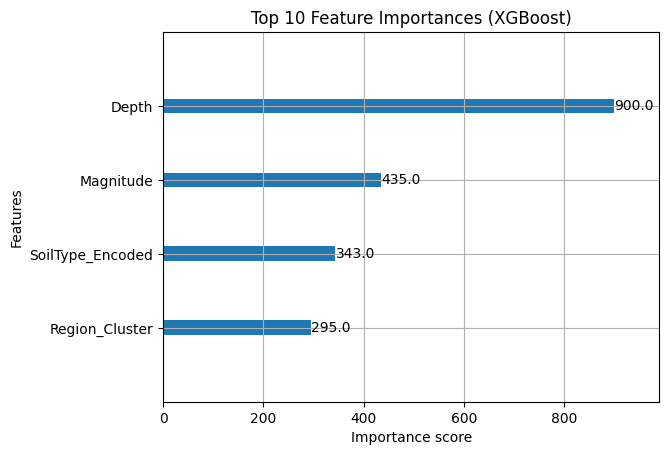

In [ ]:

#Evaluation and Explainability

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
import shap
import matplotlib.pyplot as plt

# Load the tuned XGBoost model
xgb_model = joblib.load("/content/xgboost_tuned_weighted.pkl")  # Path to your saved tuned model
label_encoder = joblib.load("/content/label_encoder.pkl")        # Path to your label encoder


# Predictions
y_pred_xgb_enc = xgb_model.predict(X_test)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_enc)
y_test_orig = label_encoder.inverse_transform(y_test_enc)


# Evaluation Metrics
print("\n📈 Evaluation Metrics")

def print_metrics(name, y_true, y_pred):
    print(f"\n🔹 {name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-score (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, labels=np.unique(y_true)))

print_metrics("XGBoost Model", y_test_orig, y_pred_xgb)

# Feature Importance Plot
plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Combine features + labels to shuffle manually
df = pd.concat([X, y], axis=1)
df.columns = list(X.columns) + ["target"]

# Ensure at least one sample per rare class in test set
test_samples = df.groupby("target", group_keys=False).apply(lambda x: x.sample(n=min(1, len(x)), random_state=42))
remaining = df.drop(test_samples.index)

# Now split remaining data normally
X_train_rest, X_test_rest, y_train_rest, y_test_rest = train_test_split(
    remaining.drop("target", axis=1),
    remaining["target"],
    test_size=0.2,
    random_state=42
)

# Add those guaranteed class samples back into test set
X_test = pd.concat([X_test_rest, test_samples.drop("target", axis=1)], axis=0)
y_test = pd.concat([y_test_rest, test_samples["target"]], axis=0)

# Re-encode
y_train_enc = label_encoder.transform(y_train_rest)
y_test_enc = label_encoder.transform(y_test)

print("✅ New Test Distribution:", y_test.value_counts())


✅ New Test Distribution: target
Low         19009
Moderate      284
Strong         30
Major           9
Name: count, dtype: int64


/tmp/ipython-input-1182867805.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_samples = df.groupby("target", group_keys=False).apply(lambda x: x.sample(n=min(1, len(x)), random_state=42))



📋 Classification Report for XGBoost Model
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     19009
       Major       1.00      1.00      1.00         9
    Moderate       1.00      1.00      1.00       284
      Strong       1.00      1.00      1.00        30

    accuracy                           1.00     19332
   macro avg       1.00      1.00      1.00     19332
weighted avg       1.00      1.00      1.00     19332



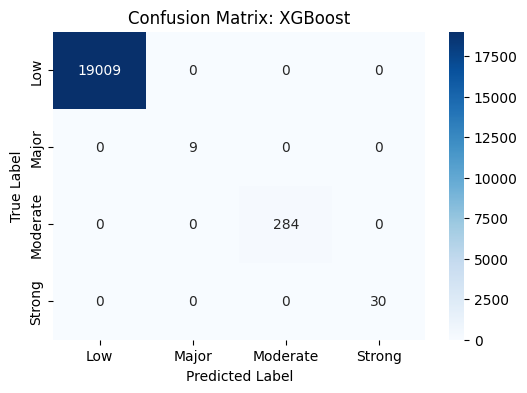

In [ ]:
#Confusion Matrix and Classification Report

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load encoder and model
label_encoder = joblib.load("/content/label_encoder.pkl")
xgb_model = joblib.load("/content/xgboost_tuned_weighted.pkl")

# Decode test labels
y_test_orig = label_encoder.inverse_transform(y_test_enc)

# Get XGBoost predictions (already numeric)
y_pred_xgb_enc = xgb_model.predict(X_test)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_enc)

class_names = label_encoder.classes_

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Classification Report + Confusion Matrix
print("\n📋 Classification Report for XGBoost Model")
print(classification_report(y_test_orig, y_pred_xgb, labels=class_names))

plot_conf_matrix(y_test_orig, y_pred_xgb, "XGBoost")


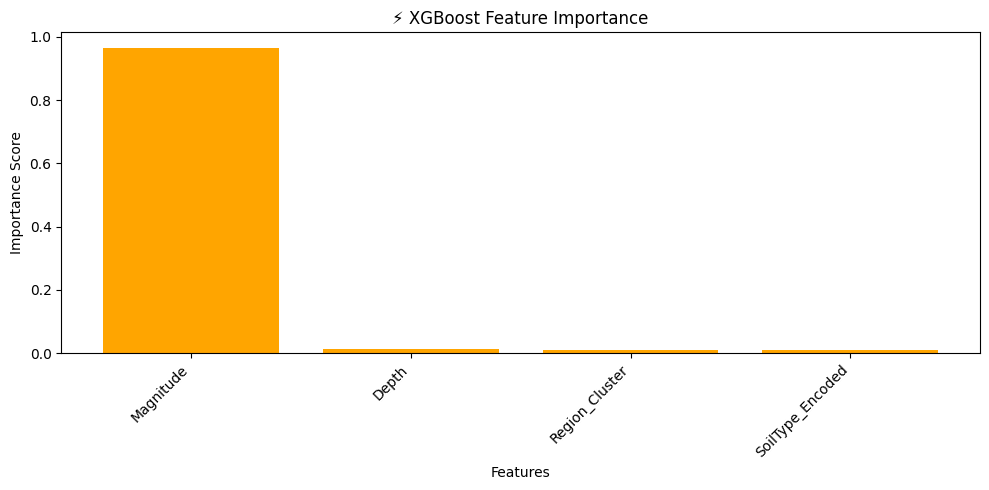

In [ ]:
#Feature Importance Visualization for XGBoost
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load trained XGBoost model
xgb_model = pickle.load(open("xgboost_tuned_weighted.pkl", "rb"))

#Ensure X_test is a DataFrame
feature_names = X_test.columns

#XGBoost Feature Importances
xgb_importances = xgb_model.feature_importances_
xgb_sorted_idx = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), xgb_importances[xgb_sorted_idx], color='orange')
plt.xticks(range(len(feature_names)), feature_names[xgb_sorted_idx], rotation=45, ha='right')
plt.title("⚡ XGBoost Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
# FEATURES & TARGET
# Ensure Magnitude_Class exists
if 'Magnitude_Class' not in df.columns:
    def classify_magnitude(mag):
        if mag < 4.0:
            return 'Low'
        elif 4.0 <= mag < 5.0:
            return 'Moderate'
        elif 5.0 <= mag < 6.0:
            return 'Strong'
        else:
            return 'Major'
    df['Magnitude_Class'] = df['Magnitude'].apply(classify_magnitude)

#drop missing target values
df = df.dropna(subset=['Magnitude_Class'])
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      1.00      1.00        56
    Moderate       1.00      1.00      1.00       196
      Strong       1.00      1.00      1.00        98

    accuracy                           1.00     19328
   macro avg       1.00      1.00      1.00     19328
weighted avg       1.00      1.00      1.00     19328


=== Decision Tree Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00     18978
       Major       1.00      1.00      1.00        56
    Moderate       1.00      1.00      1.00       196
      Strong       1.00      1.00      1.00        98

    accuracy                           1.00     19328
   macro avg       1.00      1.00      1.00     19328
weighted avg       1.00      1.00      1.00     19328



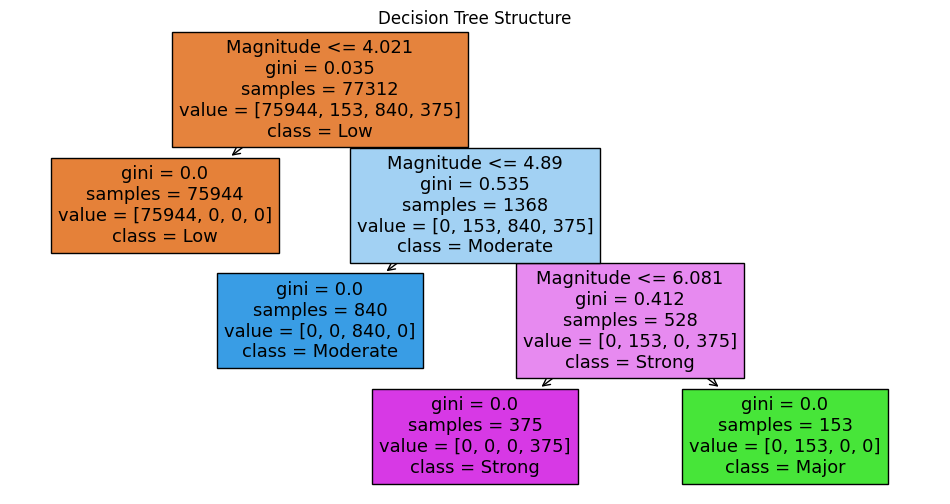

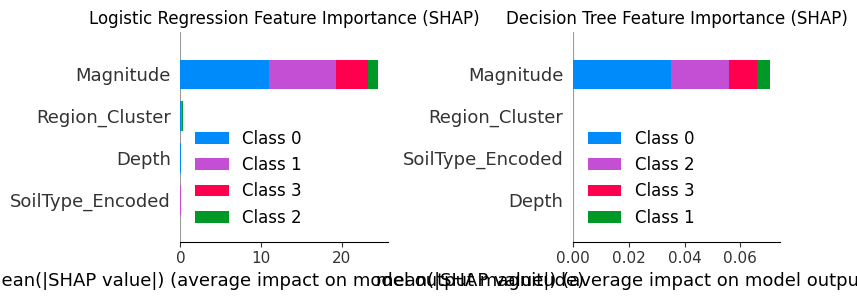


✅ Models saved successfully as 'logistic_regression_model.pkl' and 'decision_tree_model.pkl'


In [ ]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import shap
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ===== DATA SPLIT =====
df = df.dropna(subset=['Magnitude_Class'])
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== PREPROCESSING =====
numeric_cols = ['Magnitude', 'Depth']
categorical_cols = ['SoilType_Encoded', 'Region_Cluster']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

# ===== LOGISTIC REGRESSION =====
log_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='multinomial'))
])

log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))

# ===== DECISION TREE =====
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\n=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_tree))

# ===== DECISION TREE VISUALIZATION =====
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.title("Decision Tree Structure")
plt.show()

# ===== SHAP COMPARISON =====
# Logistic Regression SHAP
X_train_transformed = log_clf.named_steps['preprocess'].transform(X_train)
X_train_df = pd.DataFrame(X_train_transformed, columns=['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster'])

explainer_log = shap.LinearExplainer(log_clf.named_steps['model'], X_train_transformed)
shap_values_log = explainer_log.shap_values(X_train_transformed)

# Decision Tree SHAP
explainer_tree = shap.TreeExplainer(tree)
shap_values_tree = explainer_tree.shap_values(X_test)

# ===== SIDE-BY-SIDE COMPARISON PLOT =====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
shap.summary_plot(shap_values_log, X_train_df, plot_type="bar", show=False)
plt.title("Logistic Regression Feature Importance (SHAP)")

plt.subplot(1, 2, 2)
shap.summary_plot(shap_values_tree, X_test, plot_type="bar", show=False)
plt.title("Decision Tree Feature Importance (SHAP)")

plt.tight_layout()
plt.show()

# ===== SAVE TRAINED MODELS =====
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(log_clf, f)
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(tree, f)

print("\n✅ Models saved successfully as 'logistic_regression_model.pkl' and 'decision_tree_model.pkl'")


In [ ]:
# ======= EARTHQUAKE SEVERITY PREDICTION - GRADIO UI =======
import gradio as gr
import pickle
import joblib
import pandas as pd
import numpy as np

# ======= MODEL LOADING =======
try:
    model = pickle.load(open("xgboost_tuned_weighted.pkl", "rb"))
    label_encoder = joblib.load("label_encoder.pkl")
    MODEL_LOADED = True
except FileNotFoundError as e:
    print(f"⚠️ Model file not found: {e}")
    MODEL_LOADED = False

# ======= PREDICTION FUNCTION =======
def predict_severity(magnitude, depth, soil_type, region_cluster):
    if not MODEL_LOADED:
        return "Model not loaded. Please train and save your model first."

    # Create dataframe
    input_df = pd.DataFrame([[magnitude, depth, soil_type, region_cluster]],
                            columns=["Magnitude", "Depth", "SoilType_Encoded", "Region_Cluster"])

    # Predict
    pred_encoded = model.predict(input_df)[0]
    try:
        pred_label = label_encoder.inverse_transform([pred_encoded])[0]
    except Exception:
        pred_label = pred_encoded  # If not encoded

    return f"🌍 Predicted Earthquake Severity: **{pred_label}**"

# ======= GRADIO INTERFACE =======
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🌋 Earthquake Severity Prediction System")
    gr.Markdown("### Enter the parameters below to predict the magnitude class:")

    with gr.Row():
        magnitude = gr.Slider(0.0, 10.0, value=5.5, label="Magnitude (Richter Scale)")
        depth = gr.Slider(0.0, 700.0, value=50.0, label="Depth (km)")

    with gr.Row():
        soil_type = gr.Dropdown(choices=[0, 1, 2, 3], value=1, label="Soil Type (Encoded)")
        region_cluster = gr.Dropdown(choices=[0, 1, 2, 3], value=0, label="Region Cluster (Encoded)")

    predict_btn = gr.Button("🔍 Predict Severity", variant="primary")
    output = gr.Textbox(label="Prediction Result")

    predict_btn.click(
        predict_severity,
        inputs=[magnitude, depth, soil_type, region_cluster],
        outputs=[output]
    )

    gr.Markdown("---")
    gr.Markdown("*Based on trained machine learning model (Logistic Regression / Decision Tree / XGBoost)*")

# ======= LAUNCH APP =======
demo.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1a67464d08b16bd959.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d5abe5ca13514d332f.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://1a67464d08b16bd959.gradio.live
